In [6]:
!pip install git+git://github.com/raghakot/keras-vis.git --upgrade --no-deps

  Cloning git://github.com/raghakot/keras-vis.git to /tmp/pip-req-build-fp8aou0o
  Stored in directory: /tmp/pip-ephem-wheel-cache-zhj0wxgr/wheels/ff/01/8e/3a66d951f9b53f9894a010107b05253fb9a6c6f2555a5aaeca
Successfully built keras-vis
  Found existing installation: keras-vis 0.4.1
    Uninstalling keras-vis-0.4.1:
      Successfully uninstalled keras-vis-0.4.1


In [1]:
import os
import tensorflow as tf
from tensorflow import keras
from keras.utils import Sequence
import pandas as pd
import numpy as np
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array, ImageDataGenerator
import math
import random
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
import sklearn
from sklearn.model_selection import train_test_split
SEED = 2001
from keras import Model

Using TensorFlow backend.


In [0]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
link = 'https://drive.google.com/open?id=1IYx9kCFgCWUJgudc8Uxn59CkExRei431' 

In [4]:
fluff, id = link.split('=')
print (id) # Verify that you have everything after '='

1IYx9kCFgCWUJgudc8Uxn59CkExRei431


In [0]:
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('car.tar.gz')  
# Dataset is now stored in a Pandas Dataframe

In [6]:
!tar -xvzf car.tar.gz

data3a/training/02-moderate/0155.JPEG
data1a/training/01-whole/0637.jpg
data2a/validation/00-front/0072.JPEG
data1a/validation/01-whole/0001.jpg
data2a/training/02-side/0120.JPEG
data3a/training/02-moderate/0275.JPEG
data1a/training/01-whole/0253.jpg
data1a/training/01-whole/0747.jpg
data2a/training/01-rear/0089.JPEG
data2a/training/02-side/0240.JPEG
data3a/training/02-moderate/0286.JPEG
data3a/training/02-moderate/0205.JPEG
data1a/validation/01-whole/0111.jpg
data2a/training/02-side/0131.JPEG
data2a/validation/00-front/0013.JPEG
data1a/training/01-whole/0363.jpg
data1a/training/01-whole/0047.jpg
data2a/training/01-rear/0019.JPEG
data3a/training/02-moderate/0094.JPEG
data3a/validation/03-severe/0044.JPEG
data2a/training/02-side/0251.JPEG
data3a/training/02-moderate/0216.JPEG
data1a/training/01-whole/0761.jpg
data1a/training/00-damage/0527.jpeg
data1a/training/01-whole/0445.jpg
data1a/training/01-whole/0129.jpg
data3a/training/02-moderate/0024.JPEG
data2a/validation/00-front/0024.JPEG
d

In [0]:
datagen=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)

In [8]:
train_generator=datagen.flow_from_directory(directory="data1a/training/",target_size=(224,224),batch_size=32,class_mode="binary",shuffle=True)

Found 1840 images belonging to 2 classes.


In [9]:
valid_generator=datagen.flow_from_directory(directory="data1a/validation/",target_size=(224,224),batch_size=32,class_mode="binary",shuffle=True)

Found 460 images belonging to 2 classes.


In [0]:
from keras.applications.vgg16 import VGG16

In [0]:
conv_base=VGG16(include_top=False, weights='imagenet',input_shape=(224, 224, 3))

In [0]:
for layer in conv_base.layers:
    layer.trainable = False

In [0]:
from keras.layers import GlobalAveragePooling2D

In [0]:
flatten = Flatten()
# n1=Dense(256, activation='sigmoid',name='my_dense_1')
n1=GlobalAveragePooling2D()
#n2=Dropout(0.2)
n2 = Dense(1, activation='sigmoid', name='my_dense_2')

In [36]:
inp2 = conv_base.input
out2 = n1(conv_base.output)

model2 = Model(inp2, out2)
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [37]:
inp3 = model2.input
out3 = n2(model2.output)

model3 = Model(inp3, out3)
model3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [0]:
model3.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['acc'])

In [0]:
from keras.callbacks import ModelCheckpoint

In [0]:
filepath="weights.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

In [41]:
history=model3.fit_generator(
        train_generator,
        steps_per_epoch=100,
        epochs=50,validation_data=valid_generator, validation_steps=50,shuffle=True,callbacks=callbacks_list)

Epoch 1/50
100/100 [==============================] - 88s 880ms/step - loss: 0.6687 - acc: 0.6497 - val_loss: 0.5905 - val_acc: 0.7812

Epoch 00001: val_acc improved from -inf to 0.78117, saving model to weights.best.hdf5
Epoch 2/50
100/100 [==============================] - 81s 813ms/step - loss: 0.5717 - acc: 0.7681 - val_loss: 0.5145 - val_acc: 0.8388

Epoch 00002: val_acc improved from 0.78117 to 0.83882, saving model to weights.best.hdf5
Epoch 3/50
100/100 [==============================] - 83s 832ms/step - loss: 0.5160 - acc: 0.7913 - val_loss: 0.4638 - val_acc: 0.8461

Epoch 00003: val_acc improved from 0.83882 to 0.84610, saving model to weights.best.hdf5
Epoch 4/50
100/100 [==============================] - 83s 833ms/step - loss: 0.4775 - acc: 0.8025 - val_loss: 0.4313 - val_acc: 0.8474

Epoch 00004: val_acc improved from 0.84610 to 0.84740, saving model to weights.best.hdf5
Epoch 5/50
100/100 [==============================] - 84s 837ms/step - loss: 0.4606 - acc: 0.8031 - val

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


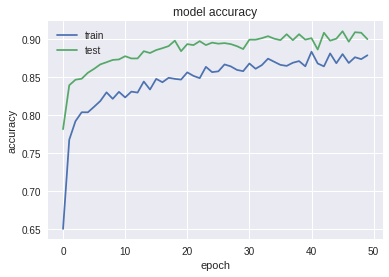

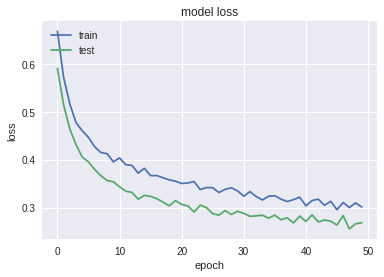

In [42]:
import matplotlib.pyplot as plt
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [0]:
model3.load_weights("weights.best.hdf5")

In [0]:
model3.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['acc'])

Using Saliency Maps to generate explanations for why the model is choosing a car as damaged.
The Saliency Map has been showen first, with the original image just below.
We can clearly see that the saliency map is trying to focus on the damaged ares of the cars.


In [0]:
img_path = 'data1a/validation/00-damage/0071.JPEG'

In [0]:
from keras.preprocessing import image
from keras import activations
from matplotlib import pyplot as plt
from vis.visualization import visualize_saliency
from vis.utils import utils
%matplotlib inline

In [0]:
img = image.load_img(img_path, target_size=(224, 224))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.

In [0]:
layer_idx=-1

In [0]:
class_idx=0

In [0]:
model3.layers[-1].activation = activations.linear
model3 = utils.apply_modifications(model3)

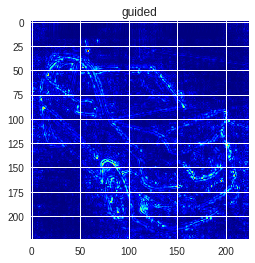

In [51]:
for modifier in ['guided']:
    grads = visualize_saliency(model3, layer_idx, filter_indices=class_idx,seed_input=img_tensor, backprop_modifier=modifier)
    plt.figure()
    plt.title(modifier)
    plt.imshow(grads, cmap='jet')

In [0]:
img_tensor=img_tensor.reshape((224, 224, 3))

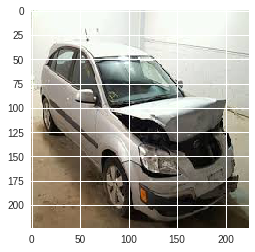

In [53]:
plt.imshow(img_tensor)

In [0]:
img_path = 'data1a/validation/00-damage/0082.JPEG'

In [0]:
img = image.load_img(img_path, target_size=(224, 224))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.

In [0]:
layer_idx=-1

In [0]:
class_idx=0

In [0]:
model3.layers[-1].activation = activations.linear
model3 = utils.apply_modifications(model3)

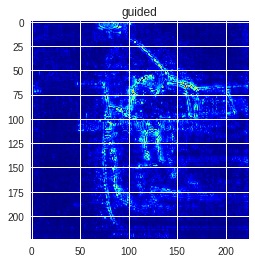

In [59]:
for modifier in ['guided']:
    grads = visualize_saliency(model3, layer_idx, filter_indices=class_idx,seed_input=img_tensor, backprop_modifier=modifier)
    plt.figure()
    plt.title(modifier)
    plt.imshow(grads, cmap='jet')

In [0]:
img_tensor=img_tensor.reshape((224, 224, 3))

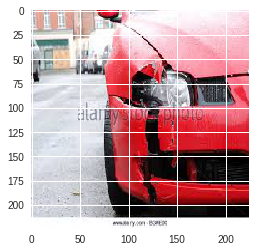

In [61]:
plt.imshow(img_tensor)

In [0]:
img_path = 'data1a/validation/00-damage/0049.jpeg'

In [0]:
img = image.load_img(img_path, target_size=(224, 224))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.

In [0]:
layer_idx=-1

In [0]:
class_idx=0

In [0]:
model3.layers[-1].activation = activations.linear
model3 = utils.apply_modifications(model3)

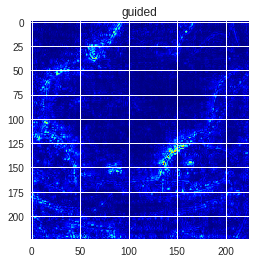

In [67]:
for modifier in ['guided']:
    grads = visualize_saliency(model3, layer_idx, filter_indices=class_idx,seed_input=img_tensor, backprop_modifier=modifier)
    plt.figure()
    plt.title(modifier)
    plt.imshow(grads, cmap='jet')

In [0]:
img_tensor=img_tensor.reshape((224, 224, 3))

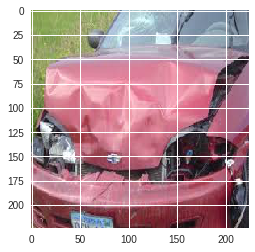

In [69]:
plt.imshow(img_tensor)

In [0]:
img_path = 'data1a/validation/00-damage/0052.JPEG'

In [0]:
img = image.load_img(img_path, target_size=(224, 224))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.

In [0]:
layer_idx=-1

In [0]:
class_idx=0

In [0]:
model3.layers[-1].activation = activations.linear
model3 = utils.apply_modifications(model3)

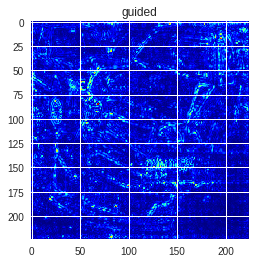

In [75]:
for modifier in ['guided']:
    grads = visualize_saliency(model3, layer_idx, filter_indices=class_idx,seed_input=img_tensor, backprop_modifier=modifier)
    plt.figure()
    plt.title(modifier)
    plt.imshow(grads, cmap='jet')

In [0]:
img_tensor=img_tensor.reshape((224, 224, 3))

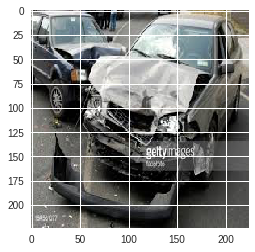

In [77]:
plt.imshow(img_tensor)